<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P7E8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

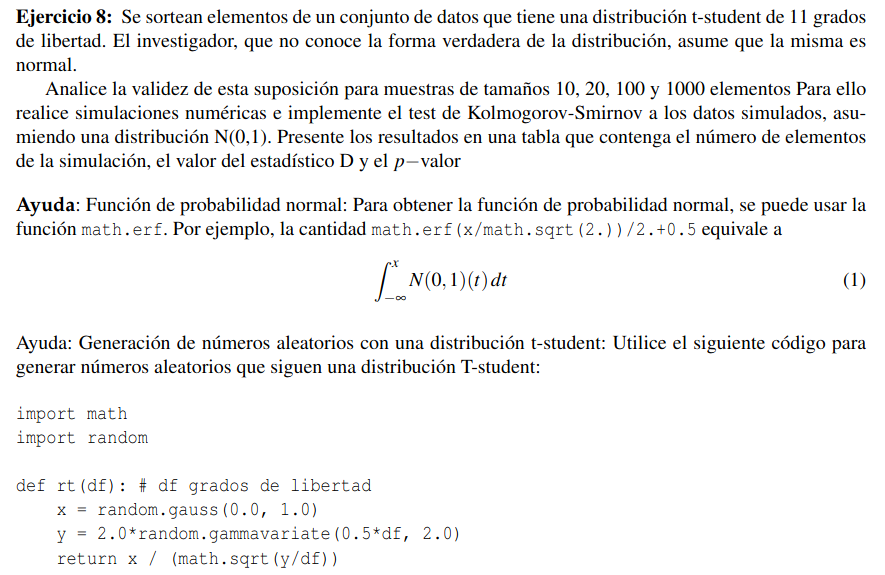

In [ ]:
import numpy as np
from random import random, seed, gammavariate, gauss
import math

N_SIM = 100_000

def tstudent():
    grados_libertad=11
    x = gauss(0.0, 1.0)
    y = 2.0*gammavariate(0.5*grados_libertad, 2.0)
    return x / (np.sqrt(y/grados_libertad))

def tstudent_rvs(n):
    return [tstudent() for i in range(n)]

def Normal_rechazo(mu, sigma):
    while True:
        Y1 = -np.log(1 - random())
        Y2 = -np.log(1 - random())
        if Y2 >=(Y1-1) ** 2 / 2:
            if random() < 0.5:
                return Y1 * sigma + mu
            return -Y1 * sigma + mu

def F_fda(x):
    return math.erf(x/np.sqrt(2)) / 2 + 0.5

def F_rvs(n): #random variable sampler
    return [Normal_rechazo(mu=0, sigma=1) for _ in range(n)]

def estadistico_KS(muestra, fda):
    tamano_muestra = len(muestra)
    muestra_ordenada = sorted(muestra)
    D_max = abs(fda(muestra_ordenada[0]) - (1 / tamano_muestra))

    for j, y in enumerate(muestra_ordenada, start=1):
        F_y = fda(y)
        D_plus = j / tamano_muestra - F_y
        D_minus = F_y - (j - 1) / tamano_muestra
        D_max = max(D_max, D_plus, D_minus)

    return D_max

def estimar_Pvalor_KS_conF(muestra_empirica, n_sim):
    tamano_muestra = len(muestra_empirica)
    d_empirico = estadistico_KS(muestra_empirica, F_fda)
    cuenta = 0
    for _ in range(n_sim):
        F_muestra = F_rvs(tamano_muestra)
        d_simulado = estadistico_KS(F_muestra, F_fda)
        if d_simulado > d_empirico:
            cuenta += 1
    return cuenta / n_sim


seed(1)
p_valor_estimado = estimar_Pvalor_KS_conF(tstudent_rvs(10), N_SIM)
print(f"P-valor estimado usando F: {p_valor_estimado}")

# Mostrar tabla
print(f"n = {TAMANO_MUESTRA_EMPIRICA}")
print(f"{'Valor':<10} {'Prob esperada':<15} {'Frec esperada':<15} {'Frec empirica':<15}")
print("-" * 60)
for valor, prob_esp, frec_esp, frec_emp in zip(VALORES, PROBABILIDADES_ESPERADAS, FRECUENCIAS_ESPERADAS, FRECUENCIAS_EMPIRICAS):
    print(f"{valor:<10} {prob_esp:<15.4f} {frec_esp:<15.4f} {frec_emp:<15}")